<a href="https://colab.research.google.com/github/erjavaid/Diabetes-Prediction-Using-Machine-Learning/blob/main/Diabetics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
import matplotlib.pyplot as plt


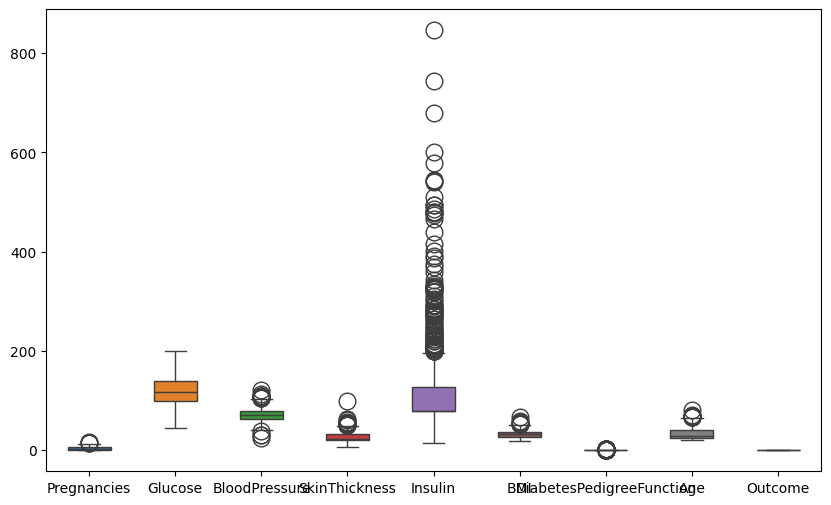

In [13]:
fix,ax=plt.subplots(figsize=(10,6))
sns.boxplot(data=df,ax=ax,fliersize=12,width=0.5)
plt.show()

In [14]:
# divide into dependent and independent
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [15]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [16]:
X.shape

(768, 8)

In [17]:
y.shape

(768,)

In [18]:
# divide into train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape

(614, 8)

In [20]:
y_test.shape

(154,)

In [21]:
# do Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [22]:
X_train

array([[-0.52639686, -1.25806262, -0.24875152, ..., -0.05130551,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.32713796,  0.81650936, ..., -0.5985773 ,
         2.41502991,  1.48710085],
       [-0.82846011,  0.57053938, -2.15757252, ..., -0.52642693,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.69285836,  1.1469629 , ...,  1.91225539,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.637034  , -0.24875152, ...,  1.45049306,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.10507706,  1.97309676, ..., -1.42109145,
        -0.61552223, -1.03594038]])

In [23]:
# train the model using logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
# do prediction
y_pred=lr.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [26]:
y_test

,Outcome
668,0
324,0
624,0
690,0
473,0
...,...
355,1
534,0
344,0
296,1


In [27]:
# find the performance of the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [28]:
accuracy_score(y_test,y_pred)

0.7662337662337663

In [29]:
confusion_matrix(y_test,y_pred)

array([[83, 16],
       [20, 35]])

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



In [32]:
# now do hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [39]:
param={
    'penalty':['l1','l2','elasticnet'],
    'C':[ 0.001, 0.01, 0.1, 1, 10],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [43]:
gr=GridSearchCV(lr,param,cv=5,scoring='accuracy')

In [42]:
import warnings
warnings.filterwarnings('ignore')



In [44]:
gr

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [46]:
gr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [47]:
gr.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [48]:
y_predt=gr.predict(X_test)

In [49]:
accuracy_score(y_test,y_predt)

0.7792207792207793

In [51]:
print(classification_report(y_test,y_predt))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



<Axes: >

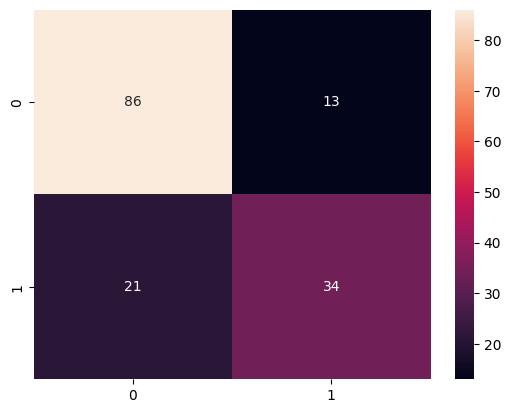

In [52]:
sns.heatmap(confusion_matrix(y_test,y_predt),annot=True)

<Axes: >

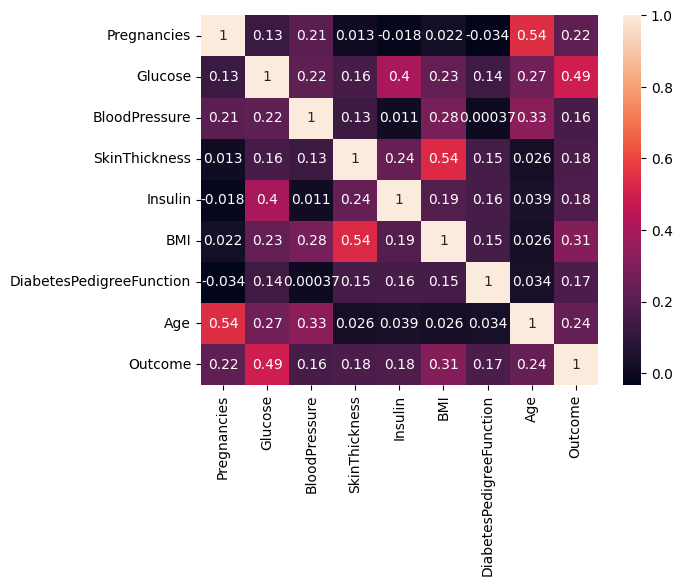

In [54]:
sns.heatmap(df.corr(),annot=True)

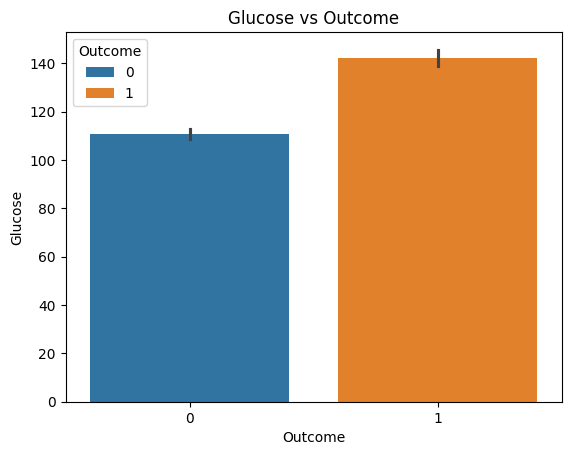

In [59]:
sns.barplot(x='Outcome', y='Glucose', data=df,hue='Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.title('Glucose vs Outcome')
plt.show()

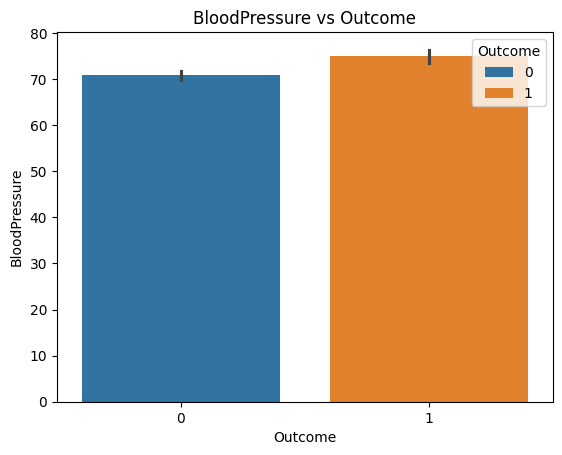

In [60]:
sns.barplot(x='Outcome', y='BloodPressure', data=df,hue='Outcome')
plt.xlabel('Outcome')
plt.ylabel('BloodPressure')
plt.title('BloodPressure vs Outcome')
plt.show()

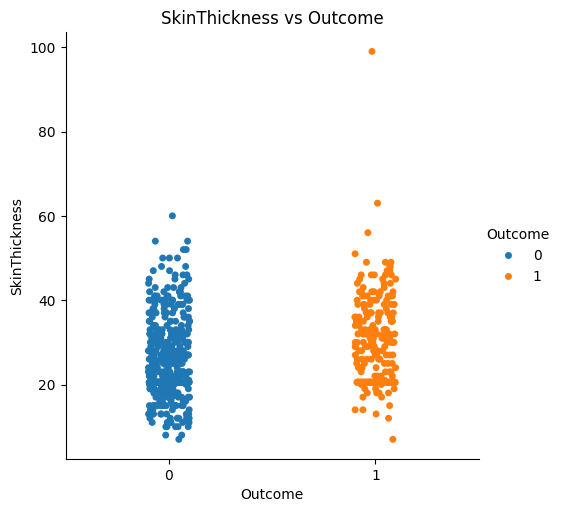

In [61]:
sns.catplot(x='Outcome', y='SkinThickness', data=df,hue='Outcome')
plt.xlabel('Outcome')
plt.ylabel('SkinThickness')
plt.title('SkinThickness vs Outcome')
plt.show()

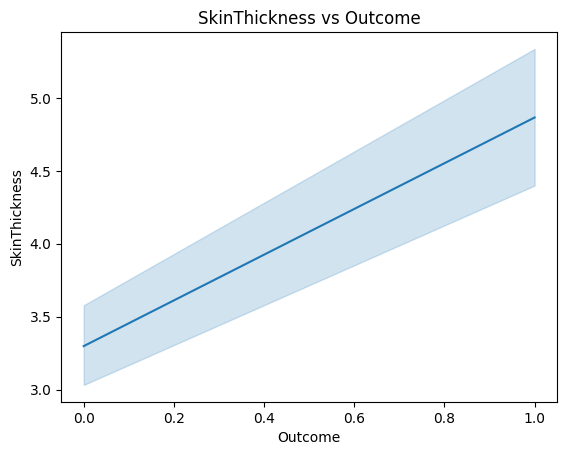

In [72]:
sns.lineplot(x='Outcome', y='Pregnancies', data=df)
plt.xlabel('Outcome')
plt.ylabel('SkinThickness')
plt.title('SkinThickness vs Outcome')
plt.show()

In [69]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


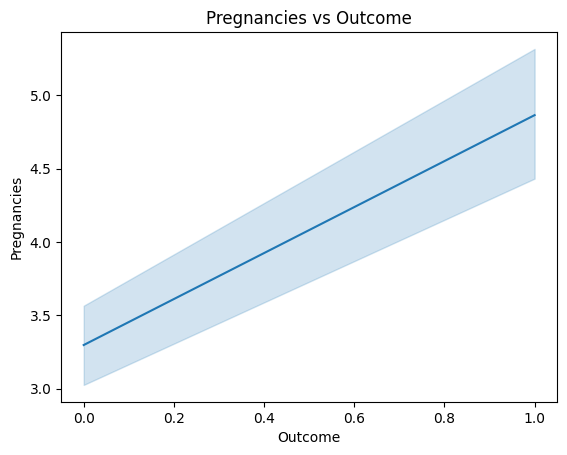

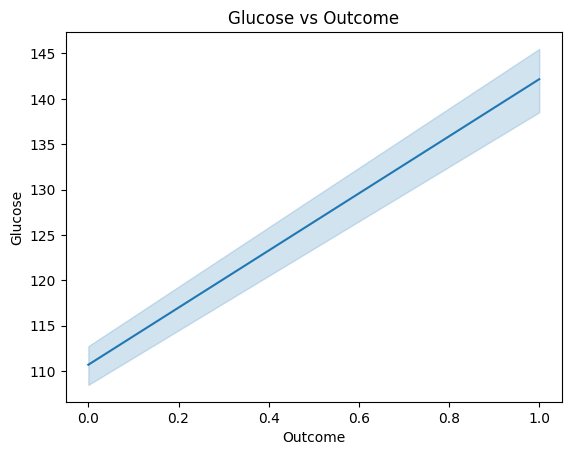

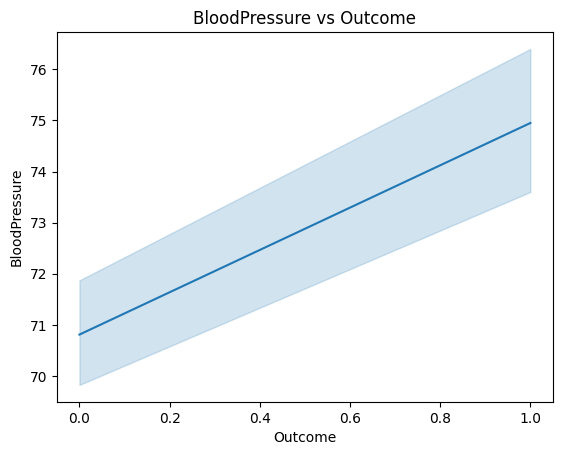

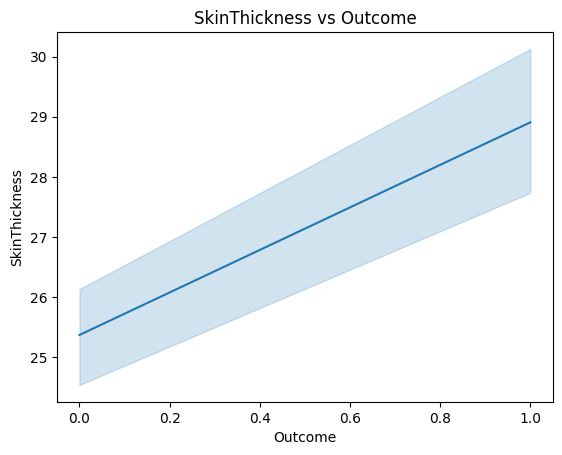

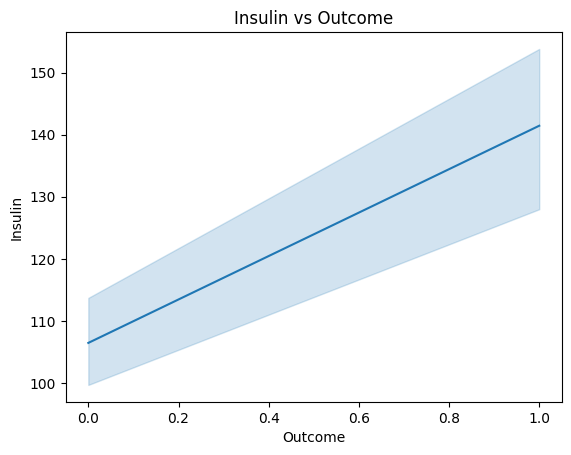

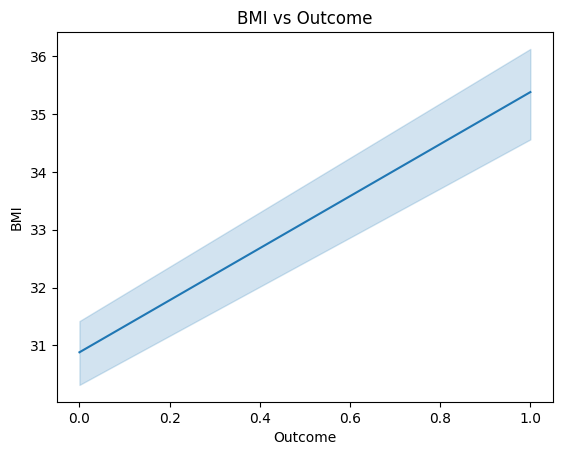

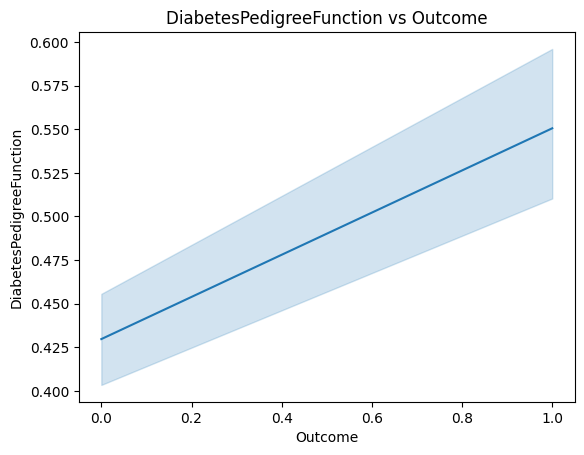

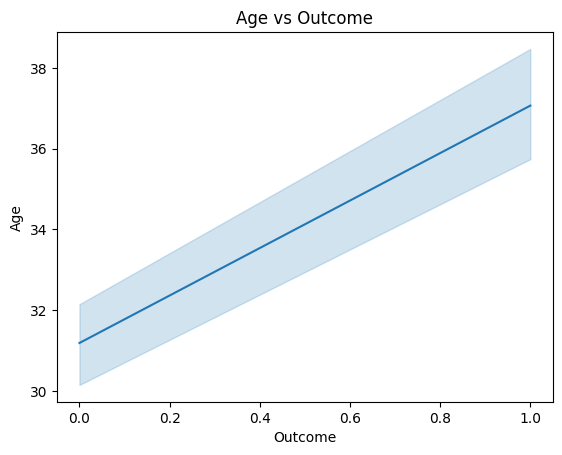

In [73]:
for column in df.columns:
    if column != 'Outcome':
        sns.lineplot(x='Outcome', y=column, data=df)
        plt.xlabel('Outcome')
        plt.ylabel(column)
        plt.title(f'{column} vs Outcome')
        plt.show()

<Axes: >

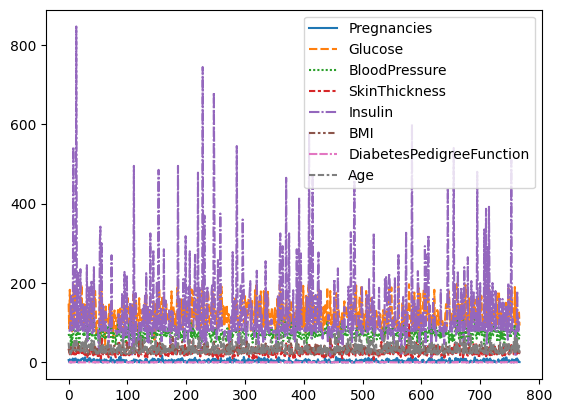

In [75]:
sns.lineplot(X)